# Monte Carlo Integration

In this document, I will write a function to perform Monte Carlo Integration on 2D and 3D shapes.

## 2D Monte Carlo Simulation vs. Integration
Here I am making two different methods of determining the area under a 2d curve. The first method is a "Hit or miss" method, where points will be randomly chosen in a bounding box around the function f(x) over the interval $[a, b]$. If they land within the function (less than f(x)), then they will be counted as part of the area under the curve. If they do not, they will be counted outside the function. 

Because the area under the curve will be proportional to the area of the bounding box, the total area under the curve can be represented as $$A_{curve}\approx A_{bound} * \frac{n_{in-bounds}}{n_{out-bounds}}$$ 




In [83]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.integrate import quad
from scipy import optimize

In [46]:
def f_a(x): #sample function
    return -0.1 *((x-4)**4) + 0.6*((x-4)**3) + 1

In [47]:
X_a = np.linspace(-1, 12, 200)
print(X_a.shape)

(200,)


TypeError: 'tuple' object is not callable

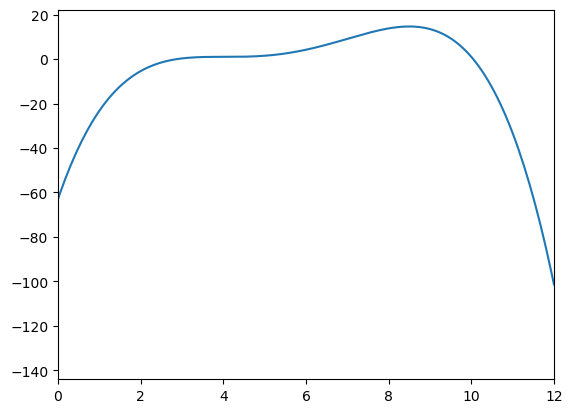

In [48]:
plt.plot(X_a, f_a(X_a))
plt.xlim(0, 12)
plt.ylim(0, 20)
plt.show()

In [73]:
#This function will simulate the Monte Carlo "Hit or Miss" Simulation
def Monte_Carlo_HM(func, min_x, max_x, max_y, n_points = 200, plots = True):
    hit_pts = 0
    total_pts = 0
    fig, ax = plt.subplots(figsize = [7, 5])

    for point in range(n_points):
        x_rand = min_x + random.random()*(max_x - min_x)
        y_rand = random.random() * 20
        y_calc = func(x_rand)
        if y_rand <= y_calc:
            hit_pts +=1
            ax.scatter(x_rand, y_rand, color = 'r')
        else:
            ax.scatter(x_rand, y_rand, color = 'blue')
        total_pts += 1
    
    if plots == True:
        ax.plot(X_a, f_a(X_a), color = 'magenta')  
        ax.set_title("MonteCarlo Simulation of Area Under Curve")
        ax.set_xlim(min_x, max_x)
        ax.set_ylim(0, max_y)
       
        plt.show()
    
    
    rect_area = (max_x - min_x) * (max_y)
    est_area = rect_area * (hit_pts/total_pts)
    print(est_area)
    return est_area
    
    
        
 
            
     

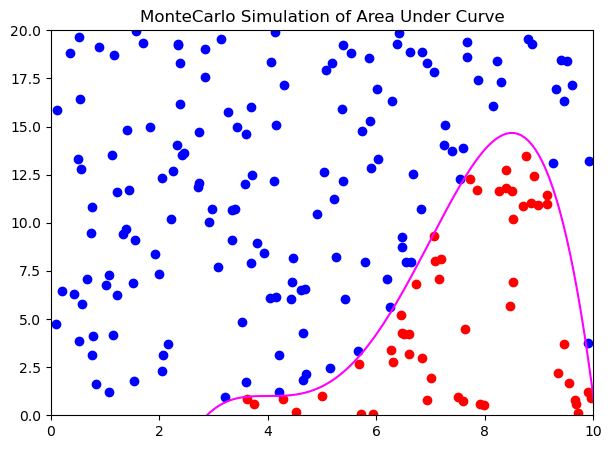

52.0


52.0

In [74]:
Monte_Carlo_HM(f_a, 0, 10, 20)

Now that we have a good model working, we can see how the estimate changes with more points:

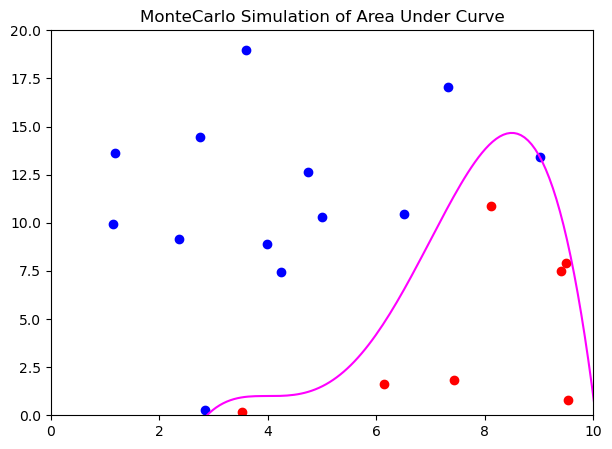

70.0
n_points =  20 
 area =  70.0


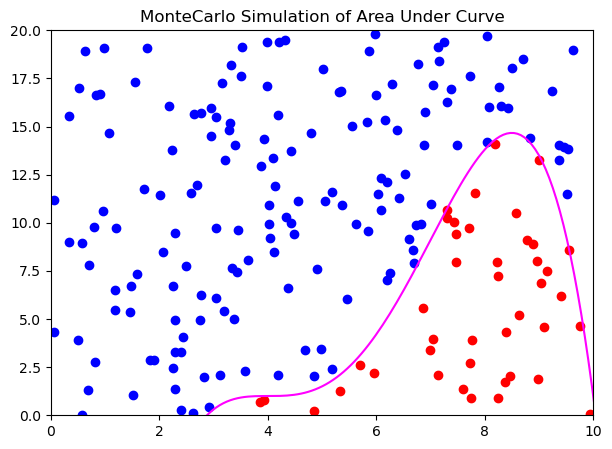

42.0
n_points =  200 
 area =  42.0


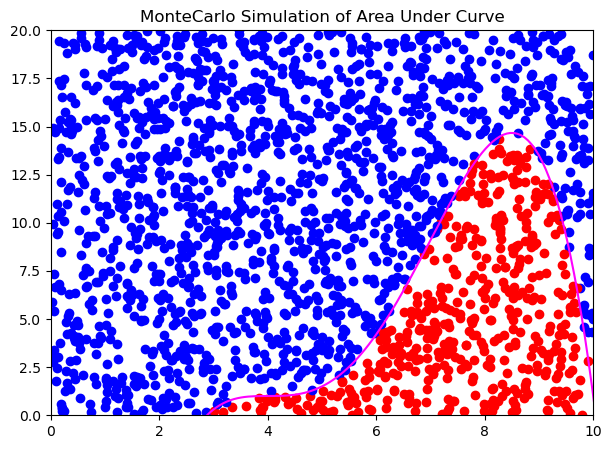

47.099999999999994
n_points =  2000 
 area =  47.099999999999994


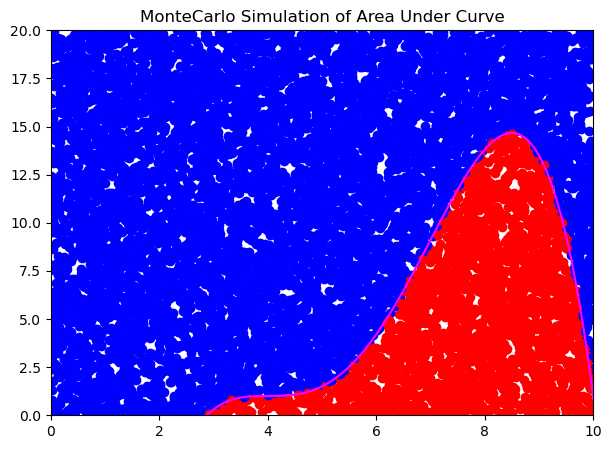

46.06
n_points =  10000 
 area =  46.06


In [75]:
for n in [20, 200, 2000, 10000]:
    area = Monte_Carlo_HM(f_a, 0, 10, 20, n_points = n)
    print("n_points = ", n, "\narea = ", area)

In [94]:
roots = optimize.root(f_a, [0, 10]).x
true_area = quad(f_a, roots[0], 10)
print("True Area = ", true_area[0])
print("Min_error: ", (true_area[0] - 46.06)/true_area[0])

True Area =  45.72872527923819
Min_error:  -0.007244346277726166


### Monte Carlo Hit-Or-Miss analysis:
As we can see from the procession of npoints above in the Monte_Carlo_HM function, the more points there are the closer the estimated area under the curve is to the true area. In the final simulation with 10000 points, the area value is off by less than 0.5, or  less than 0.01% of the area. 

## Monte Carlo 2D Integration
In this section, I will be implementing a function to simulate Monte Carlo integration over an interval [a, b] as discussed in the README. I will use a similar function as the one above.


In [95]:
def f_b(x):
    return -0.1 *((x-4)**4) + 0.6*((x-4)**3) + 3

TypeError: 'tuple' object is not callable

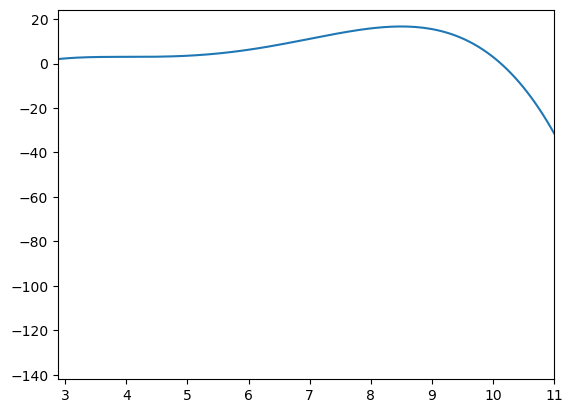

In [105]:
plt.plot(X_a, f_b(X_a))
plt.xlim(roots[0], 11)
plt.ylim(0, 20)
plt.show()

In [118]:
def MonteCarlo2d(func, a, b, n_points = 200, plots = True):
    sum_area = 0
    
    fig, ax = plt.subplots(figsize = [7, 5])
    for xval in range(n_points):
    
        x_rand = a + random.random()*(b - a)
        y_calc = func(x_rand)
        ax.scatter(x_rand, y_calc, color = 'g')
        rect_area = (b-a) * y_calc
        sum_area += rect_area
     
        
    
    if plots == True:
        ax.plot(X_a, f_b(X_a), color = 'magenta')  
        ax.set_title("MonteCarlo Integration of Area Under Curve")
        ax.set_xlim(a, b)
        ax.set_ylim(0, 20)
       
        plt.show()
    
    
    print(sum_area/n_points)
    return sum_area/n_points

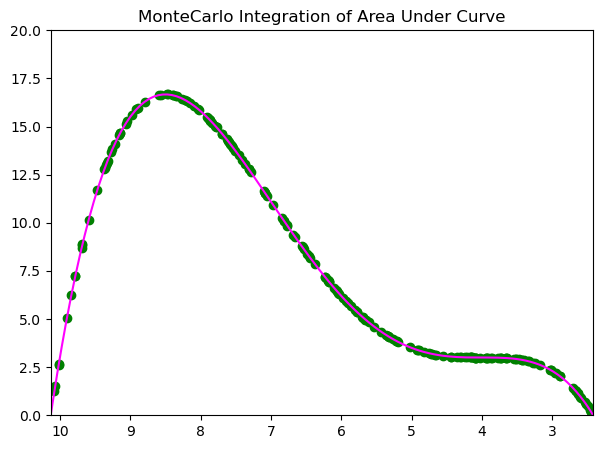

58.95798616461756


In [124]:
area_b = MonteCarlo2d(f_b, roots[0], roots[1])

In [125]:
roots_b = optimize.root(f_b, [0, 10]).x
true_area_b = quad(f_b, roots[0], 10)
print("True Area = ", true_area_b[0])
print("Min_error: ", (true_area_b[0] - area_b)/true_area_b[0])

True Area =  60.48827502718513
Min_error:  0.025298933750050216


With this model, we can also test how the convergence changes over time:


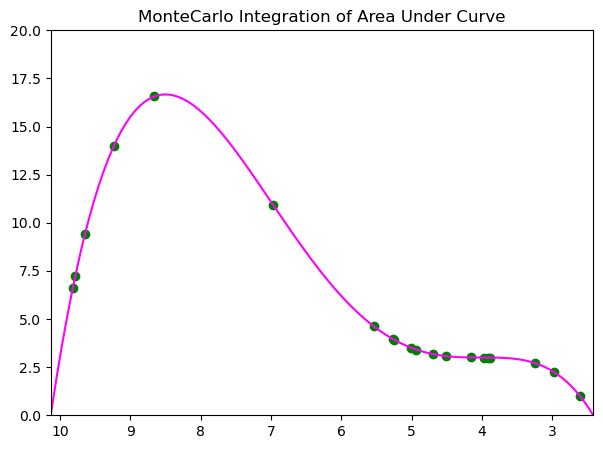

41.81218191766957
Calculated Area:  41.81218191766957
Error %:  0.3087555910814451


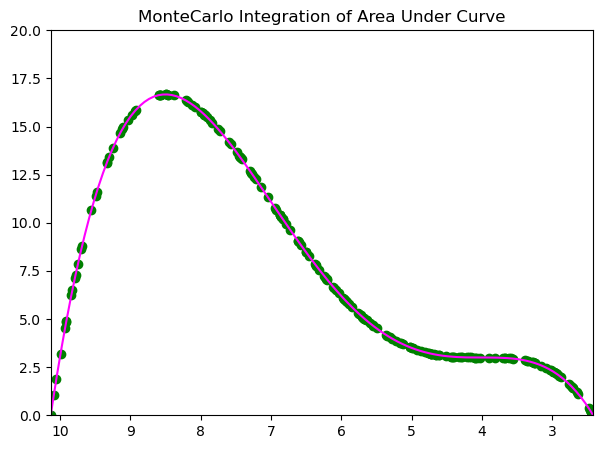

56.5783461044403
Calculated Area:  56.5783461044403
Error %:  0.0646394515463964


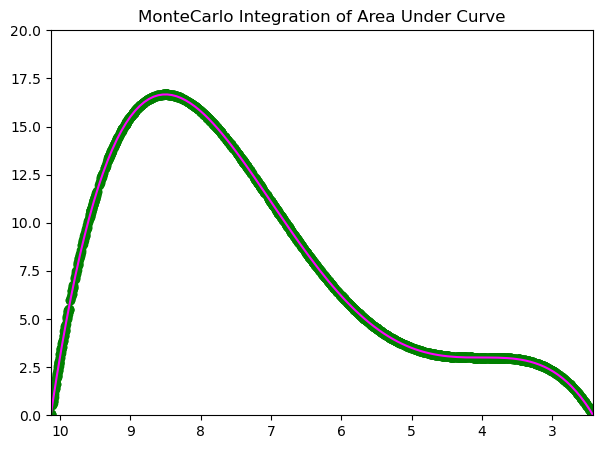

59.17675213605291
Calculated Area:  59.17675213605291
Error %:  0.02168226636555242


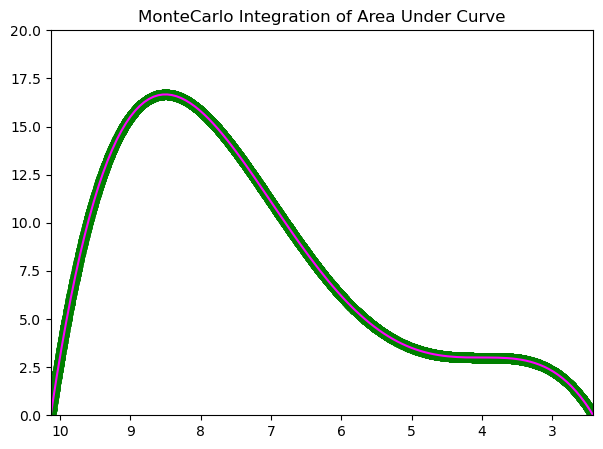

60.358361822447705
Calculated Area:  60.358361822447705
Error %:  0.002147741933110847


In [129]:
for n in [20, 200, 2000, 10000]:
    ab = MonteCarlo2d(f_b, roots_b[0], roots_b[1], n_points = n)
    print("Calculated Area: ", ab)
    print("Error %: ", (true_area_b[0] - ab)/true_area_b[0])

### Monte Carlo Integration 2d Reflection: 
The plots above illustrate some of the shortcomings and successes of this method of integration. The function I chose to use has fairly steep sections at the beginning and a flatter section at the end where the value of the function is lower. Because each point along the x-axis has the same probability of being chosen, points on a steep section vary more and can cause the Monte Carlo simulation to be more likely to over or underestimate the volume with a lower number of points. If few points are used in the calculation, then a point on the steep part may be much lower or higher than the average. When more points are used to sum the area, there is less variation in the values (f(x)) used to calculate the area.

This points to a shortcoming of the Monte Carlo Integration method, that it works poorly on functions that have many features or fluctuate a lot. 

## Monte Carlo Integration 3D:
In this section, I wanted to explore how well this Integration method works in 3D. 